<a href="https://colab.research.google.com/github/aya49/flowMagic_test/blob/main/pytorchblitz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pytorch 60min blitz

https://pytorch.org/tutorials/beginner/blitz/tensor_tutorial.html#sphx-glr-beginner-blitz-tensor-tutorial-py

About: Pytorch is a GPU NumPy

In [2]:
from __future__ import print_function
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import timeit
import os

In [3]:
os.getcwd()

'/content'

## `torch.Tensor` = ndarrays on GPU's + stores gradients wrt tensor

Initialization

In [ ]:
x = torch.empty(5,3) # 5 rows x 3 cols empty matrix initialized with whatever values in memory
print(x)
x = torch.rand(5,3)
print(x)
x = torch.zeros(5,3, dtype=torch.long)
print(x)
x = torch.tensor([5.7,3])
print(x)
x = x.new_ones(5,3, dtype=torch.double) # takes in sizes
print(x)
x = torch.randn_like(x, dtype=torch.float)
print(x)

print(x.size()) # tuple

tensor([[9.2276e-36, 0.0000e+00, 3.3631e-44],
        [0.0000e+00,        nan, 0.0000e+00],
        [4.4721e+21, 1.5956e+25, 4.7399e+16],
        [3.7293e-08, 1.2516e-01, 5.4791e-01],
        [8.2966e-02, 2.4792e-01, 4.4324e-01]])
tensor([[0.4375, 0.2890, 0.3701],
        [0.3332, 0.0127, 0.2664],
        [0.5388, 0.6094, 0.5601],
        [0.8692, 0.1287, 0.4997],
        [0.9105, 0.3578, 0.6735]])
tensor([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]])
tensor([5.7000, 3.0000])
tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64)
tensor([[ 0.8928, -0.4377,  2.0547],
        [ 0.0429, -1.9768, -0.8068],
        [-0.8232,  0.5002, -0.2720],
        [-0.6848, -2.2044,  1.5039],
        [-0.6223,  0.0755,  0.8858]])
torch.Size([5, 3])


Operations

In [ ]:
# add
y = torch.rand(5, 3)
z = x + y
print(z)
z = torch.add(x, y)
print(z)
torch.add(x, y, out=z)
print(z)
y.add_(x) # mutates tensor; these functions end with _ e.g. x.copy_(y), x.t_()
print(y)

In [ ]:
# NumPy-like indexing
print(x[:, 1])
print(x[1, :])

In [ ]:
# resize/reshape tensor
x = torch.randn(4,4)
y = x.view(16)
z = x.view(-1, 8)  # the size -1 is inferred from other dimensions
print(x.size(), y.size(), z.size())
print(x)
print(y)
print(z)

torch.Size([4, 4]) torch.Size([16]) torch.Size([2, 8])
tensor([[ 0.9968, -0.7254, -0.6890,  0.2245],
        [-1.3150, -0.3868,  0.3986,  0.8721],
        [-0.2168, -1.5288,  0.7834,  1.1503],
        [ 1.0178, -0.8915, -0.5528, -0.8309]])
tensor([ 0.9968, -0.7254, -0.6890,  0.2245, -1.3150, -0.3868,  0.3986,  0.8721,
        -0.2168, -1.5288,  0.7834,  1.1503,  1.0178, -0.8915, -0.5528, -0.8309])
tensor([[ 0.9968, -0.7254, -0.6890,  0.2245, -1.3150, -0.3868,  0.3986,  0.8721],
        [-0.2168, -1.5288,  0.7834,  1.1503,  1.0178, -0.8915, -0.5528, -0.8309]])


In [ ]:
# get one element as number
x = torch.randn(1)
print(x)
print(x.item())

In [ ]:
# convert torch tensor to numpy array; 
# all tensor except CharTensor share the same memory location on CPU
a = torch.ones(2,5)
b = a.numpy()
print(a)
print(b)

a.add_(1)
print(a)
print(b)

b = np.ones(5)
a = torch.from_numpy(b)
np.add(b, 1, out=b)
print(a)
print(b)

tensor([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]])
[[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]
tensor([[2., 2., 2., 2., 2.],
        [2., 2., 2., 2., 2.]])
[[2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2.]]
tensor([2., 2., 2., 2., 2.], dtype=torch.float64)
[2. 2. 2. 2. 2.]


CUDA tensors

In [ ]:
# run only if CUDA is available
if torch.cuda.is_available():
  device = cuda.device("cuda")
  y = torch.ones_like(x, device=device) # create tensor on GPU _like
  x = x.to(device) # or put into GPU
  z = x + y
  z = z.to("CPU", dtype=torch.double)
  print(z)

## `autograd.Function`: automatic differentiation for all operations on tensors by implementing `forward` and `backward` definitions of an `autograd` operation.

**`Function` class object** + **`torch.Tensor` class object** = acyclic graph encoding a complete history of computation.

`torch.Tensor` = ndarray + tracks all gradients/operations on it wrt tensors if `.requires_grad=True`; supports `autograd` functions like `backwards()`
- `.grad_fn` attribute references a `Function` that created the Tensor (Tensors created by user: `grad_fn` is None).
- `.grad` attribute stores gradients calculated by calling `torch.Tensor.backward()`.
- `.backward()` method calculates gradients; need to specify `gradient` argument if `Tensor` not a scalar (hold 1 element data)

To stop tensor from stop tracking computation, use `.detach()`; can also wrap code with `with torch.no_grad():`. helpful when evaluating a models with trainable parameters where `requires_grad=True`, but for which we don’t need the gradients.

changing `requires_grad` attribute

In [ ]:
a = torch.randn(2,2)
a = ((a*3) / (a-1))
print(a.requires_grad) # defaults to False

a.requires_grad_(True)
print(a.requires_grad)

b = (a * a).sum() # inherits
print(b.requires_grad)
print(b.grad_fn)

False
True
True


In [ ]:
x = torch.ones(2,2, requires_grad=True)
print(x)
y = x + 2
print(y) # y was created by an operation

z = y * y * 3
print(z)
out = z.mean()
print(out)

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)
tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)
tensor([[27., 27.],
        [27., 27.]], grad_fn=<MulBackward0>)
tensor(27., grad_fn=<MeanBackward0>)


gradients: back propagation

In [ ]:
out.backward()
# out.backward(gradient=torch.tensor(1.))

print(x.grad) # gradient d(out)/dx
print(x)
print(out)

tensor([[4.5000, 4.5000],
        [4.5000, 4.5000]])
tensor([[1., 1.],
        [1., 1.]], requires_grad=True)
tensor(27., grad_fn=<MeanBackward0>)


In [ ]:
x = torch.randn(3, requires_grad=True)
y = x * 2
while y.data.norm() < 1000:
  print(y.data.norm())
  y = y * 2

print(y) # y is not a scalar anymore

# vector-Jacobian product
v = torch.tensor([0.1, 1.0, 0.0001], dtype=torch.float)
y.backward(v)

print(x.grad)

tensor(7.1603)
tensor(14.3207)
tensor(28.6413)
tensor(57.2827)
tensor(114.5654)
tensor(229.1308)
tensor(458.2616)
tensor(916.5231)
tensor([  297.4769, -1417.3617, -1123.6777], grad_fn=<MulBackward0>)
tensor([5.1200e+01, 5.1200e+02, 5.1200e-02])


stop autograd from tracking history on tensors

In [ ]:
print(x.requires_grad)
print((x ** 2).requires_grad)

print(x)
print(x ** 2)

with torch.no_grad():
    print((x ** 2).requires_grad)

True
True
tensor([ 0.5810, -2.7683, -2.1947], requires_grad=True)
16
tensor([0.3376, 7.6634, 4.8166], grad_fn=<PowBackward0>)
False


copy a Tensor but drop gradients

In [ ]:
print(x.requires_grad)
y = x.detach()
print(y.requires_grad)
print(x.eq(y).all()) # all(x == y)

True
False
tensor(True)
tensor([True, True, True])


## `torch.nn` package: `nn.Modeule` class = neural network module encapsulates parameters

define network `nn.Module` = layers + `forward(input)` method that returns `output`; with helpers for moving them to GPU, exporting, loading, etc.

define `forward` (with tensor operations) and `autograd` automatically defines `backward` (calculates gradients)

`torch.nn` only supports mini-batch of samples as inputs, and not a single sample. e.g. `nn.Conv2d` will take in a 4D Tensor of: `nSamples x nChannels x Height x Width`. For single samples, just `input.unsqueeze(0)` to add a fake batch dimension.

`nn.Parameter`: A Tensor that is automatically registered as a parameter when assigned as an attribute to a `Module`.


![image.png](https://pytorch.org/tutorials/_images/mnist.png)

In [ ]:
class Net(nn.Module):
  def __init__(self):
    super(Net, self).__init__()
    # 3x3 square convolution
    self.conv1 = nn.Conv2d(1, 6, 3) # 1 input image > 6 output channels
    self.conv2 = nn.Conv2d(6, 16, 3) # 6 input > 16 output channels
    # an affine operation: y = Wx + b
    self.fc1 = nn.Linear(16 * 6 * 6, 120) # 16 channels x 6*6 image dimension > 120 +
    self.fc2 = nn.Linear(120, 84)
    self.fc3 = nn.Linear(84, 10)

  def forward(self, x):
    # Max pooling over a (2, 2) window
    x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
    # If the size is a square you can only specify a single number
    x = F.max_pool2d(F.relu(self.conv2(x)), 2)
    x = x.view(-1, self.num_flat_features(x))
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    return x

  def num_flat_features(self, x):
    size = x.size()[1:]  # all dimensions except the batch dimension
    num_features = 1
    for s in size:
      num_features *= s
    return num_features

# input -> conv2d -> relu -> maxpool2d -> conv2d -> relu -> maxpool2d
#       -> view -> linear -> relu -> linear -> relu -> linear
#       -> MSELoss
#       -> loss
#       <- loss.backward(): calculate gradient, differentiate wrt loss
      
# network layers
net = Net()
print(net)

# learnable parameters
params = list(net.parameters())
print(len(params))
print(params[0].size())  # conv1's .weight

Net(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=576, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


input: random 32 x 32

In [ ]:
# nSamples x nChannels x Height x Width. For single samples, just input.unsqueeze(0) twice
input = torch.randn(1, 1, 32, 32)
out = net(input)
print(out)

# Zero the gradient buffers of all parameters + backprop with random gradient
net.zero_grad()
out.backward(torch.randn(1, 10))

tensor([[ 0.0157,  0.0444,  0.0553, -0.0129, -0.0123, -0.0068, -0.0252, -0.1041,
          0.0969, -0.0712]], grad_fn=<AddmmBackward>)


### Loss function

input: `(output, target)`

output: distance

loss functions: https://pytorch.org/docs/nn.html#loss-functions

In [ ]:
output = net(input)
target = torch.randn(10)  # a dummy target, for example [10]
target = target.view(1, -1)  # make it the same shape as output [1, 10]
print(target.size())

criterion = nn.MSELoss()
loss = criterion(output, target)
print(loss)
print(loss.grad_fn)  # MSELoss
print(loss.grad_fn.next_functions[0][0])  # Linear
print(loss.grad_fn.next_functions[0][0].next_functions[0][0])  # ReLU

torch.Size([1, 10])
tensor(0.5137, grad_fn=<MseLossBackward>)


## backprop

backpropagate the error with `loss.backward()`

need to clear existing gradients, else gradients will be accumulated to existing gradients.

modules and loss functions: https://pytorch.org/docs/nn

In [ ]:
net.zero_grad() # zeroes the gradient buffers of all parameters

print('conv1.bias.grad before backward')
print(net.conv1.bias.grad)

loss.backward()

# conv1’s bias gradients before and after the backward
print('conv1.bias.grad after backward')
print(net.conv1.bias.grad)

conv1.bias.grad before backward
tensor([0., 0., 0., 0., 0., 0.])
conv1.bias.grad after backward
tensor([ 1.6879e-03,  7.6034e-03,  2.8099e-03,  5.5014e-03, -5.7640e-05,
         2.7964e-03])


## `torch.optim` package: update weights (gradient descent)

stochastic gradient descent:

    weight = weight - learning_rate * gradient

In [ ]:
learning_rate = 0.01
for f in net.parameters():
  f.data.sub_(f.grad.data * learning_rate)

other types of gradient descent:

In [ ]:
# create optimizer
optimizer = optim.SGD(net.parameters(), lr=0.01)

# training loop:
optimizer.zero_grad() # zero the gradient buffers; gradients are accumulated
output = net(input)
loss = criterion(output, target)
loss.backward()
optimizer.step() # update

## data

packackes to process different types of data before turning them into tensors with `torch.*Tensor`
- images e.g. Pillow, OpenCV, `torchvision` has data loaders for datasets such as Imagenet, CIFAR10, MNIST, etc. and data transformers for images, viz., `torchvision.datasets` and `torch.utils.data.DataLoader`
- audio e.g. scipy, librosa
- text e.g. Python/Cython loading, NLTK, SpaCY

For this tutorial, we will use the CIFAR10 dataset. It has the classes: ‘airplane’, ‘automobile’, ‘bird’, ‘cat’, ‘deer’, ‘dog’, ‘frog’, ‘horse’, ‘ship’, ‘truck’. The images in CIFAR-10 are of size 3x32x32, i.e. 3-channel color images of 32x32 pixels in size.

1. Load and normalizing the CIFAR10 training and test datasets using torchvision
2. Define a Convolutional Neural Network
3. Define a loss function
4. Train the network on the training data
5. Test the network on the test data


Files already downloaded and verified
Files already downloaded and verified


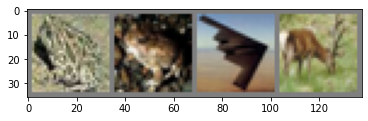

 frog  frog plane  deer


In [ ]:
# 1. Load and normalizing the CIFAR10 training and test datasets using torchvision

# If Windows and error BrokenPipeError, set num_worker of torch.utils.data.DataLoader() to 0.

# torchvision datasets are PILImage images of range [0, 1]. 
# transform them to Tensors of normalized range [-1, 1].
transform = transforms.Compose( [transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))] )

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

# functions to show an image
def imshow(img):
    img = img / 2 + 0.5 # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# get random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [ ]:
# 2. Define a Convolutional Neural Network

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5) # 3 input channels
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net()

# 3. Define a Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [ ]:
# 4. Train the network

start = timeit.default_timer()
for epoch in range(2):  # loop over the dataset 2 times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0
stop = timeit.default_timer()
print('Finished Training', stop - start)

# save trained model
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

[1,  2000] loss: 1.445
[1,  4000] loss: 1.396
[1,  6000] loss: 1.361
[1,  8000] loss: 1.339
[1, 10000] loss: 1.308
[1, 12000] loss: 1.275
[2,  2000] loss: 1.241
[2,  4000] loss: 1.219
[2,  6000] loss: 1.230
[2,  8000] loss: 1.200
[2, 10000] loss: 1.198
[2, 12000] loss: 1.181
Finished Training 153.92176498199842


In [ ]:
# 5. Test the network on the test data
# If the prediction is correct, we add the sample to the list of correct predictions.

dataiter = iter(testloader)
images, labels = dataiter.next()

# display an image from the test set
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

# load saved model
net = Net()
net.load_state_dict(torch.load(PATH))

# test output
outputs = net(images)
_, predicted = torch.max(outputs, 1)

print(prediced)
print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

# test whole test data set (much better than 10% chance)
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

# classes that did well
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1

print("\nclasses that did well")
for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

In [ ]:
# 5.5 training on a gpu (transfer a model onto a gpu the same way we transfer a tensor)

# make device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Assuming that we are on a CUDA machine, this should print a CUDA device:
print(device) # cuda:0

# recursively go over all modules and convert their parameters and buffers to CUDA tensors
net.to(device)

# also send the inputs and targets at every step to the GPU too
inputs, labels = data[0].to(device), data[1].to(device)